<a href="https://colab.research.google.com/github/LiorGuetta/AI-picture-recognition/blob/Lior-dev/Copy_of_AI_REAL_FAKE_IMG_RECOGNIZER_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/RoiLe/AI-picture-recognition/blob/Roi-dev/demo_AI_img_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science final project - [proposal]
#### by Lior Guetta & Roi Levi

<h1>(1) Problem description</h1>

// The description will be here

In a world where image generators are on the rise, there is a need to understand which images are real or which images were created by a machine. This situation is important to us for many scenarios, for example if we take it to the news, now we can easily create an image that will show a situation that never happened before, or for example we can steal copyrights by creating a similar image of a well-known artist, and that's just the tip of the iceberg.

For these reasons, we chose to produce a reliability measure for images.

######some examples of generated images

#### requirements

In [ ]:
!pip install opendatasets
!pip install pandas

#### imports

In [ ]:
import opendatasets as od
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import shutil
import random
import numpy as np
from PIL import Image
import seaborn as sns


## Data Collection

#### kaggle DS
##### 120K of FAKE&REAL images

In [ ]:
od.download("https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: liorguetta
Your Kaggle Key: ··········


100%|██████████| 105M/105M [00:01<00:00, 76.8MB/s] 


<h1>(2) EDA</h1>

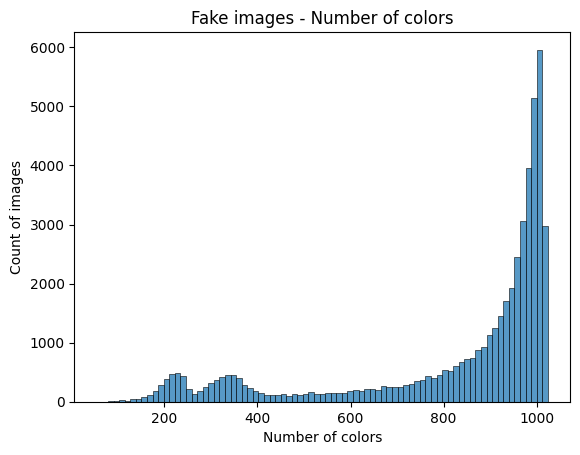

Average number of colors for fake images:  826.076


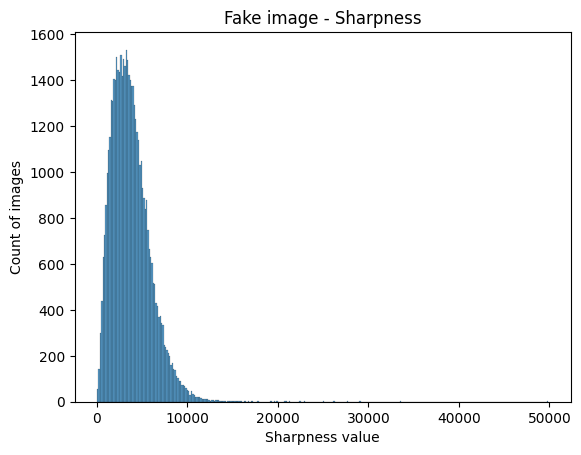

Average sharpness for fake images:  3772.899


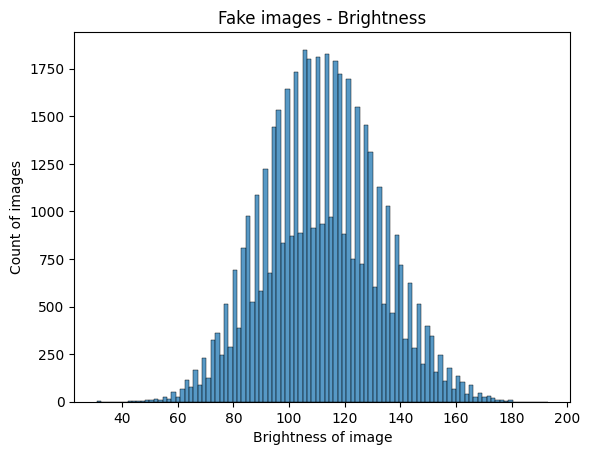

Average brightness for fake images:  111.762


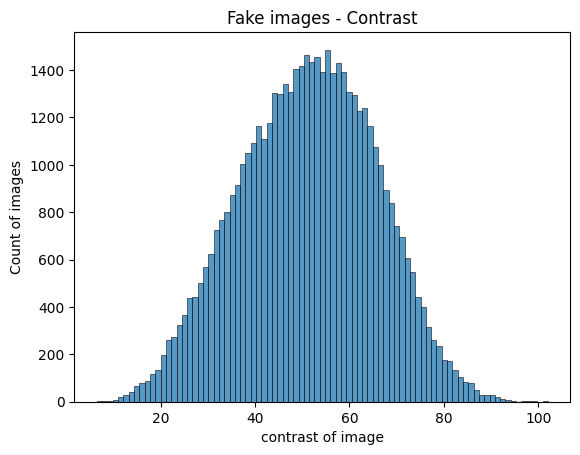

Average contrast for fake images:  51.224


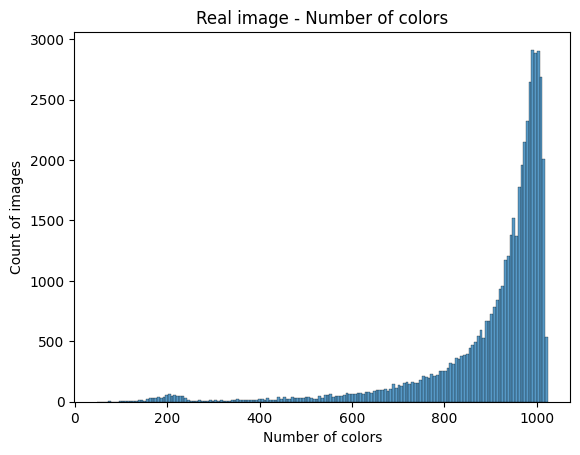

Average number of colors for real images:  907.034


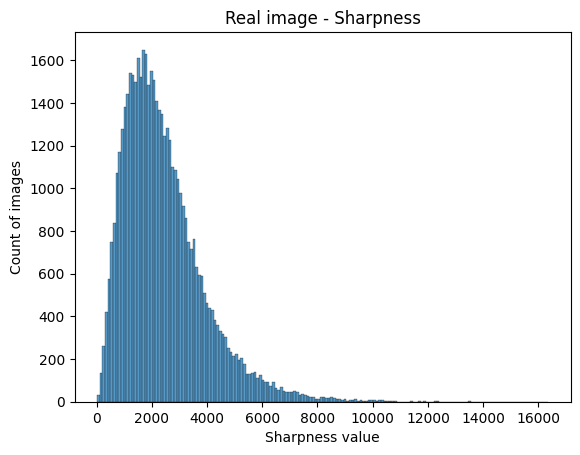

Average sharpness for real images:  2432.842


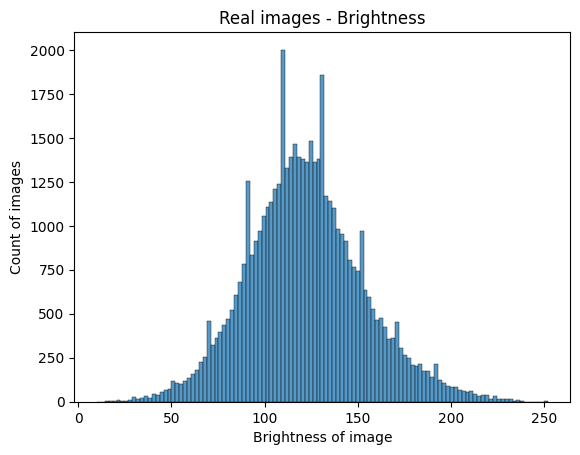

Average brightness for real images:  122.098


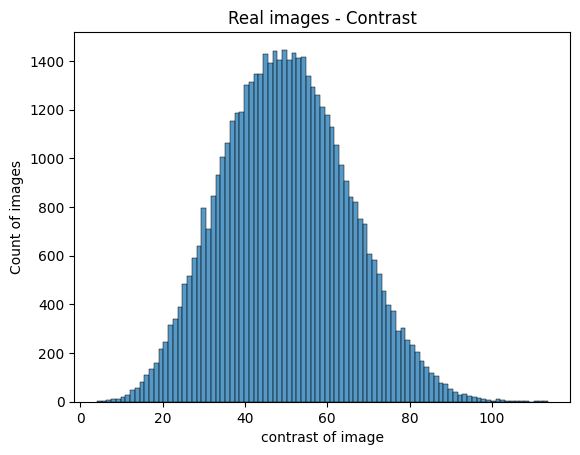

Average contrast for real images:  49.995


In [ ]:
base_path = './cifake-real-and-ai-generated-synthetic-images'
TEST, TRAIN = 'test', 'train'
REAL, FAKE = 'REAL', 'FAKE'

test_fake = os.listdir('./cifake-real-and-ai-generated-synthetic-images/test/FAKE')
test_real = os.listdir('./cifake-real-and-ai-generated-synthetic-images/test/REAL')
train_fake = os.listdir('./cifake-real-and-ai-generated-synthetic-images/train/FAKE')
train_real = os.listdir('./cifake-real-and-ai-generated-synthetic-images/train/REAL')
arr_fake = []
arr_real = []
arr_fake_num_colors = []
arr_real_num_colors = []
arr_fake_sharpness = []
arr_real_sharpness = []
arr_fake_brightness = []
arr_real_brightness = []
arr_fake_contrast = []
arr_real_contrast = []
max_colors = 10000
total_colors_fake = 0
total_colors_real = 0
total_sharpness_fake = 0
total_sharpness_real = 0
total_brightness_fake = 0
total_brightness_real = 0
total_contrast_fake = 0
total_contrast_real = 0
for picture in train_fake :
    image = cv2.imread(os.path.join(base_path, TRAIN, FAKE, picture))
    img = Image.open(os.path.join(base_path, TRAIN, FAKE, picture))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    total_colors_fake = total_colors_fake +(len(img.getcolors(max_colors)))
    sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
    total_sharpness_fake = total_sharpness_fake + sharpness
    arr_fake_sharpness.append(sharpness)
    brightness = int(gray.mean())
    contrast = np.std(gray)
    total_contrast_fake = total_contrast_fake +contrast
    arr_fake_contrast.append(contrast)
    total_brightness_fake = total_brightness_fake+brightness
    arr_fake_brightness.append(brightness)
    arr_fake_num_colors.append(len(img.getcolors(max_colors)))
    arr_fake.append(image)
sns.histplot(arr_fake_num_colors)
# Set labels and limits
plt.xlabel('Number of colors')
plt.ylabel('Count of images')
plt.title('Fake images - Number of colors')
# Show the plot
plt.show()
print('Average number of colors for fake images: ',round((total_colors_fake/len(train_fake)),3))
sns.histplot(arr_fake_sharpness)
# Set labels and limits
plt.xlabel('Sharpness value')
plt.ylabel('Count of images')
plt.title('Fake image - Sharpness')
# Show the plot
plt.show()
print('Average sharpness for fake images: ',round((total_sharpness_fake/len(train_fake)),3))
sns.histplot(arr_fake_brightness)
# Set labels and limits
plt.xlabel('Brightness of image')
plt.ylabel('Count of images')
plt.title('Fake images - Brightness')
# Show the plot
plt.show()
print('Average brightness for fake images: ',round((total_brightness_fake/len(train_fake)),3))
sns.histplot(arr_fake_contrast)
# Set labels and limits
plt.xlabel('contrast of image')
plt.ylabel('Count of images')
plt.title('Fake images - Contrast')
# Show the plot
plt.show()
print('Average contrast for fake images: ',round((total_contrast_fake/len(train_fake)),3))


for picture in train_real :
    image = cv2.imread(os.path.join(base_path, TRAIN, REAL, picture))
    img = Image.open(os.path.join(base_path, TRAIN, REAL, picture))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    total_colors_real = total_colors_real +(len(img.getcolors(max_colors)))
    sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
    total_sharpness_real = total_sharpness_real + sharpness
    arr_real_sharpness.append(sharpness)
    brightness = int(gray.mean())
    contrast = np.std(gray)
    total_contrast_real = total_contrast_real + contrast
    arr_real_contrast.append(contrast)
    total_brightness_real = total_brightness_real+brightness
    arr_real_brightness.append(brightness)
    arr_real_num_colors.append(len(img.getcolors(max_colors)))
    arr_real.append(image)
sns.histplot(arr_real_num_colors)
# Set labels and limits
plt.xlabel('Number of colors')
plt.ylabel('Count of images')
plt.title('Real image - Number of colors')
# Show the plot
plt.show()
print('Average number of colors for real images: ',round((total_colors_real/len(train_real)),3))
sns.histplot(arr_real_sharpness)
# Set labels and limits
plt.xlabel('Sharpness value')
plt.ylabel('Count of images')
plt.title('Real image - Sharpness')
# Show the plot
plt.show()
print('Average sharpness for real images: ',round((total_sharpness_real/len(train_real)),3))
sns.histplot(arr_real_brightness)
# Set labels and limits
plt.xlabel('Brightness of image')
plt.ylabel('Count of images')
plt.title('Real images - Brightness')
# Show the plot
plt.show()
print('Average brightness for real images: ',round((total_brightness_real/len(train_real)),3))
sns.histplot(arr_real_contrast)
# Set labels and limits
plt.xlabel('contrast of image')
plt.ylabel('Count of images')
plt.title('Real images - Contrast')
# Show the plot
plt.show()
print('Average contrast for real images: ',round((total_contrast_real/len(train_real)),3))


<h1>(3) Basic Algoritms</h1>

<h2>HOGS</h2>

<h2>GANS</h2>

#### Splitting
   train: 80K images,
   val:   20k images,
   test:  20k images

In [ ]:


# Set paths
input_folder = "cifake-real-and-ai-generated-synthetic-images"
output_folder = "NEW-cifake-real-and-ai-generated-synthetic-images"

train_ratio = 0.8
validation_ratio = 0.2

# List classes
classes = ["FAKE", "REAL"]

# Create folders
for folder in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_folder, folder, "FAKE"), exist_ok=True)
    os.makedirs(os.path.join(output_folder, folder, "REAL"), exist_ok=True)

# Loop through classes and split
for class_name in classes:
    class_folder = os.path.join(input_folder, "train", class_name)
    files = os.listdir(class_folder)
    random.shuffle(files)

    train_count = int(train_ratio * len(files))
    val_count = int(validation_ratio * len(files))

    train_files = files[:train_count]
    val_files = files[train_count:train_count + val_count]
    test_files = files[train_count + val_count:]

    for file in train_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "train", class_name, file)
        shutil.copy(src, dest)

    for file in val_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "val", class_name, file)
        shutil.copy(src, dest)

    for file in test_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "test", class_name, file)
        shutil.copy(src, dest)


# preprocessing

### show some data

In [ ]:
# reading the XLSX file
fake_folder =('NEW-cifake-real-and-ai-generated-synthetic-images\\train\FAKE')

images_path = []
for filename in os.listdir(fake_folder):
  img = os.path.join(fake_folder,filename)
  if img is not None:
      images_path.append(img)


some random FAKE images


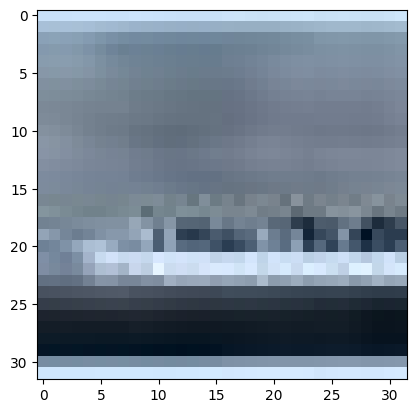

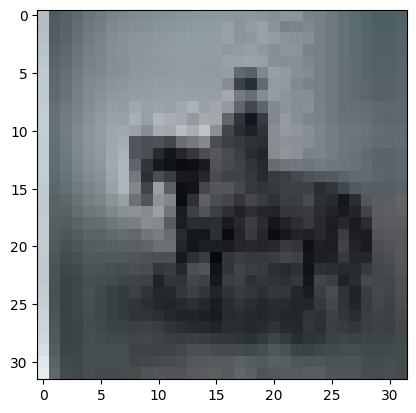

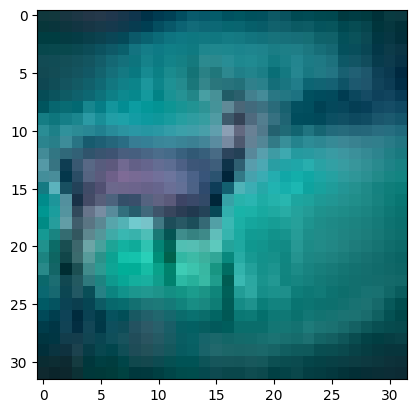

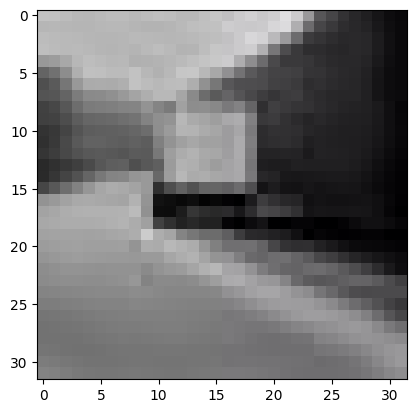

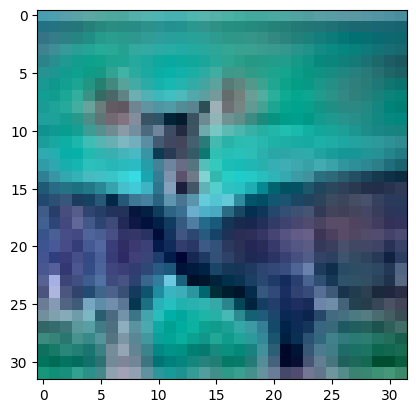

In [ ]:
print("some random FAKE images")

for i in range(5):
    j = random.randint(0, 39999)
    image = cv2.imread(images_path[j])
    image_name = "img"

    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        plt.imshow(image)
        plt.show()
    else:
        print(f"Error loading image {images_path[j]}")



# model


### starts build the CNN

In [ ]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    brightness_range = (0.2, 1.4),
    rotation_range = 20,
    rescale = 1./255,
    zoom_range = [0.5, 1.5],
    channel_shift_range=150.0,
    horizontal_flip = True
)
training_set = train_datagen.flow_from_directory(
    'NEW-cifake-real-and-ai-generated-synthetic-images\\train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 80000 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('NEW-cifake-real-and-ai-generated-synthetic-images\\val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20000 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = val_set, epochs = 10)

Epoch 1/10
2500/2500 [==============================] - 399s 160ms/step - loss: 0.5988 - accuracy: 0.6761 - val_loss: 0.4244 - val_accuracy: 0.8132
Epoch 2/10
2500/2500 [==============================] - 392s 157ms/step - loss: 0.5555 - accuracy: 0.7152 - val_loss: 0.4075 - val_accuracy: 0.8202
Epoch 3/10
2500/2500 [==============================] - 333s 133ms/step - loss: 0.5286 - accuracy: 0.7357 - val_loss: 0.4154 - val_accuracy: 0.8027
Epoch 4/10
2500/2500 [==============================] - 330s 132ms/step - loss: 0.5058 - accuracy: 0.7514 - val_loss: 0.3234 - val_accuracy: 0.8622
Epoch 5/10
2500/2500 [==============================] - 328s 131ms/step - loss: 0.4908 - accuracy: 0.7604 - val_loss: 0.3140 - val_accuracy: 0.8664
Epoch 6/10
2500/2500 [==============================] - 344s 138ms/step - loss: 0.4767 - accuracy: 0.7710 - val_loss: 0.4084 - val_accuracy: 0.8000
Epoch 7/10
2500/2500 [==============================] - 360s 144ms/step - loss: 0.4697 - accuracy: 0.7760 - val_

In [ ]:
training_set.class_indices

{'FAKE': 0, 'REAL': 1}

In [ ]:
cnn.save('FAKE_REAL_IMG_cnn_model_V1.h5')

C:\Users\Yehiam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('FAKE_REAL_IMG_cnn_model_V1.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# predict 10 images in every clsass

In [ ]:
# reading the XLSX file
FAKE_TEST_folder =('NEW-cifake-real-and-ai-generated-synthetic-images\\test\FAKE')
REAL_TEST_folder =('NEW-cifake-real-and-ai-generated-synthetic-images\\test\REAL')

fake_test_images_path = []
real_test_images_path = []

for fakefilename in os.listdir(FAKE_TEST_folder):
  fake_img = os.path.join(FAKE_TEST_folder,fakefilename)
  if fake_img is not None:
      fake_test_images_path.append(fake_img)

for realfilename in os.listdir(REAL_TEST_folder):
  real_img = os.path.join(REAL_TEST_folder,realfilename)
  if real_img is not None:
      real_test_images_path.append(real_img)


1/1 [==============================] - 0s 200ms/step
[[1. 0.]]


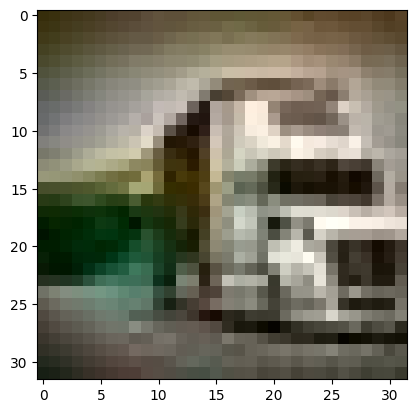

1/1 [==============================] - 0s 42ms/step
[[1. 0.]]


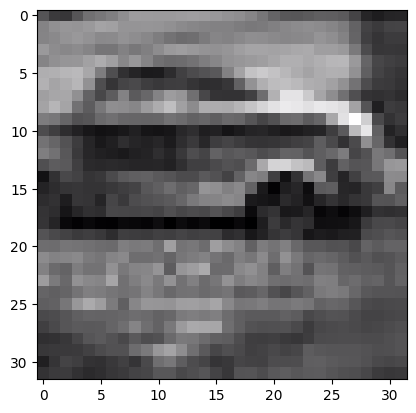

1/1 [==============================] - 0s 60ms/step
[[1. 0.]]


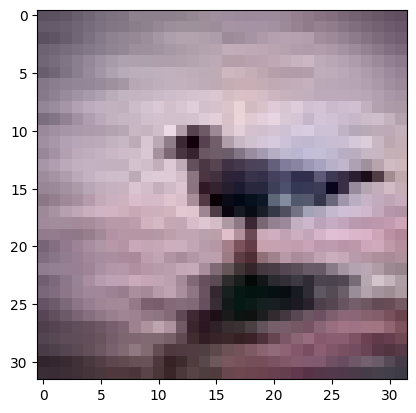

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


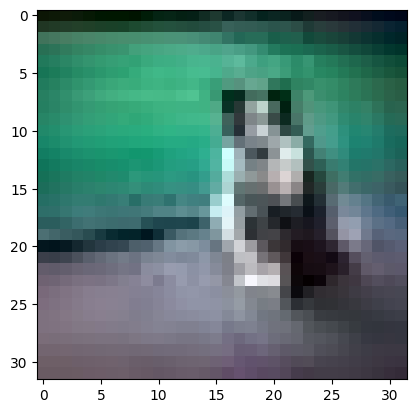

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


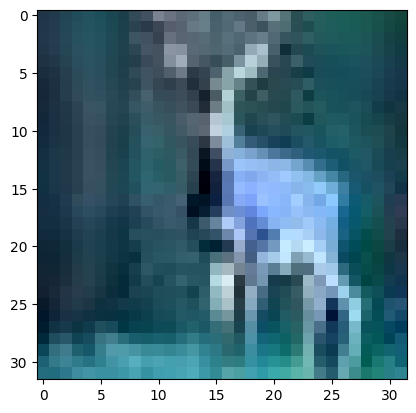

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


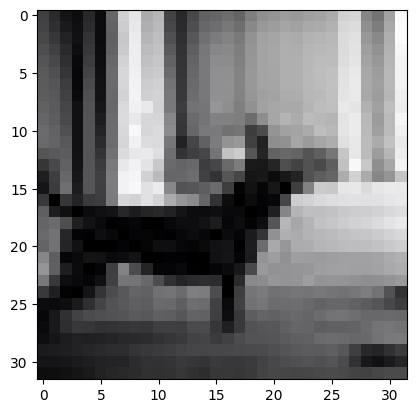

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


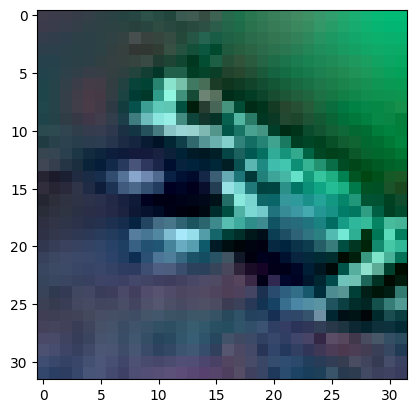

1/1 [==============================] - 0s 37ms/step
[[1. 0.]]


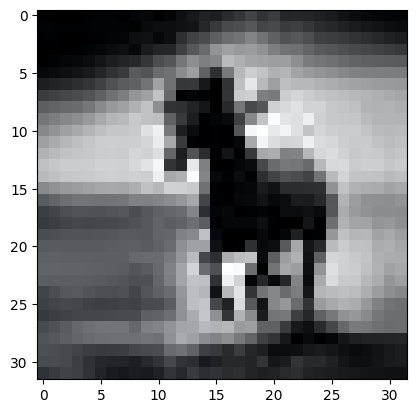

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


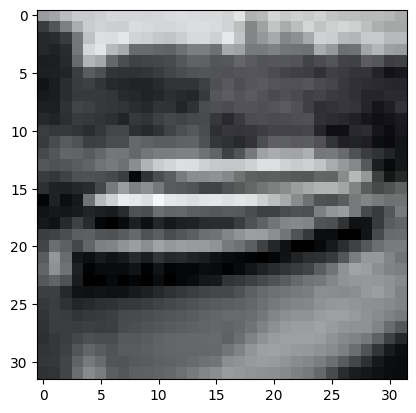

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


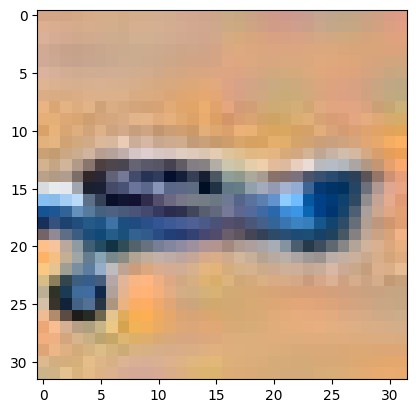

In [ ]:
for i in range(10):
    image = cv2.imread(fake_test_images_path[i])
    test_image = tf.keras.utils.load_img(fake_test_images_path[i], target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    print(result)
    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        plt.imshow(image)
        plt.show()
    else:
        print(f"Error loading image {images_path[i]}")


1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


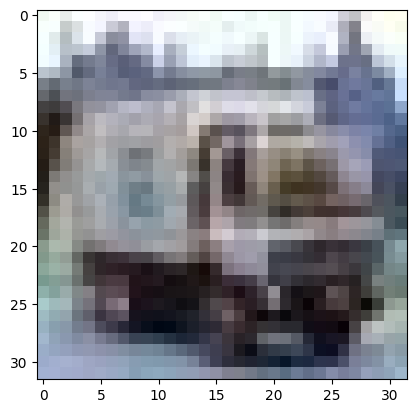

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


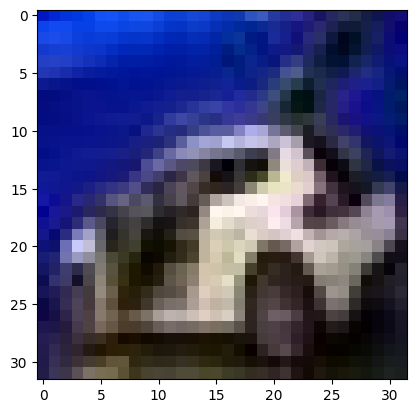

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


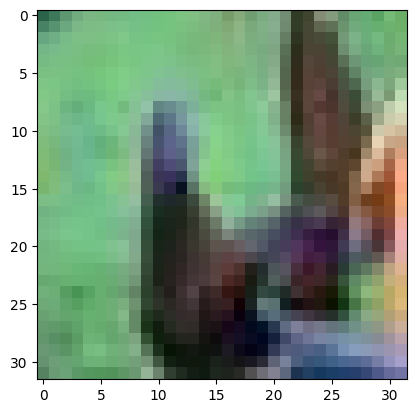

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


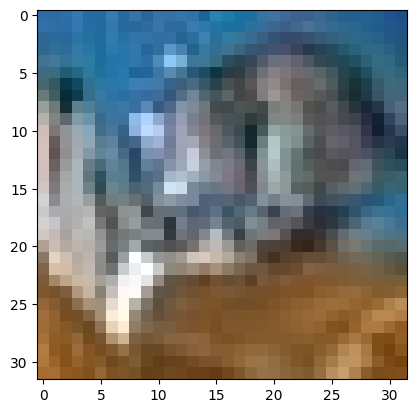

1/1 [==============================] - 0s 38ms/step
[[1.0000000e+00 2.1915458e-37]]


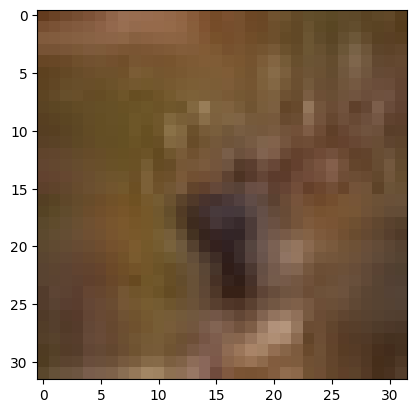

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


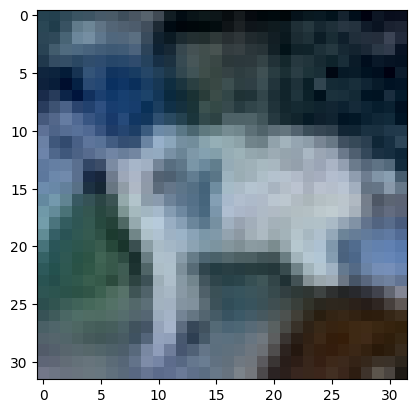

1/1 [==============================] - 0s 35ms/step
[[1. 0.]]


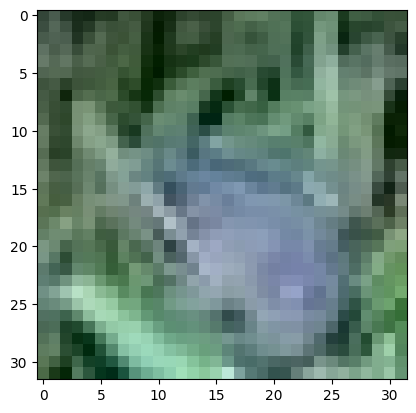

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


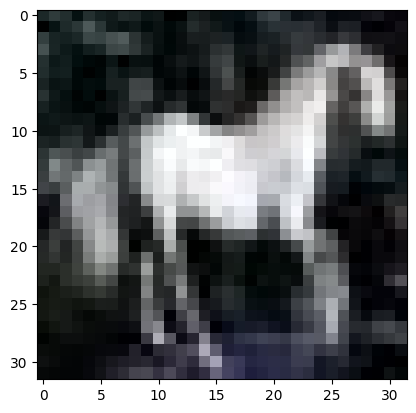

1/1 [==============================] - 0s 37ms/step
[[1. 0.]]


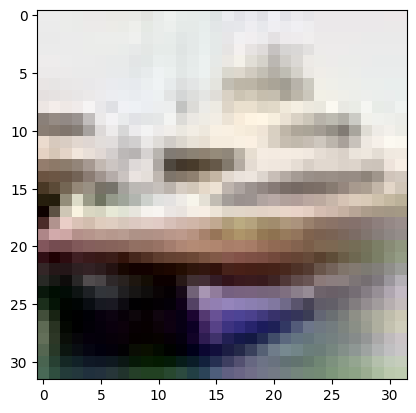

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


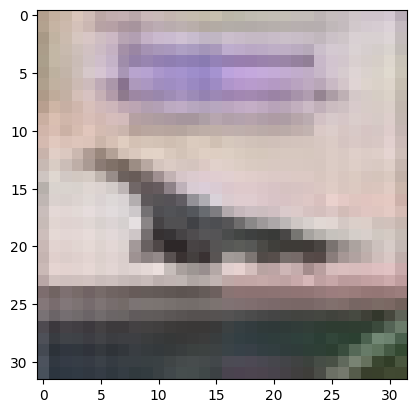

In [ ]:
for j in range(10):
    image = cv2.imread(real_test_images_path[j])
    test_image = tf.keras.utils.load_img(real_test_images_path[j], target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    print(result)
    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        plt.imshow(image)
        plt.show()
    else:
        print(f"Error loading image {images_path[j]}")

<h1>(4) first analize</h1>

<h1>(5) future thoughts</h1>